<a href="https://colab.research.google.com/github/Sahar-bgi/python/blob/main/digit_image_using_nural_network_with_save_load_reload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt

In [ ]:
batch_size = 128
num_classes = 10
epochs = 2
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


Label: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


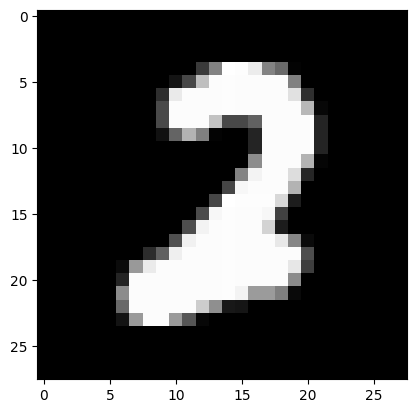

In [ ]:
print("Label:",y_test[199:200])
plt.imshow(x_test[199:200].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 27562 (107.66 KB)
Trainable params: 27562 (107.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Shape of First Layer (784, 32)
Visualization of First Layer


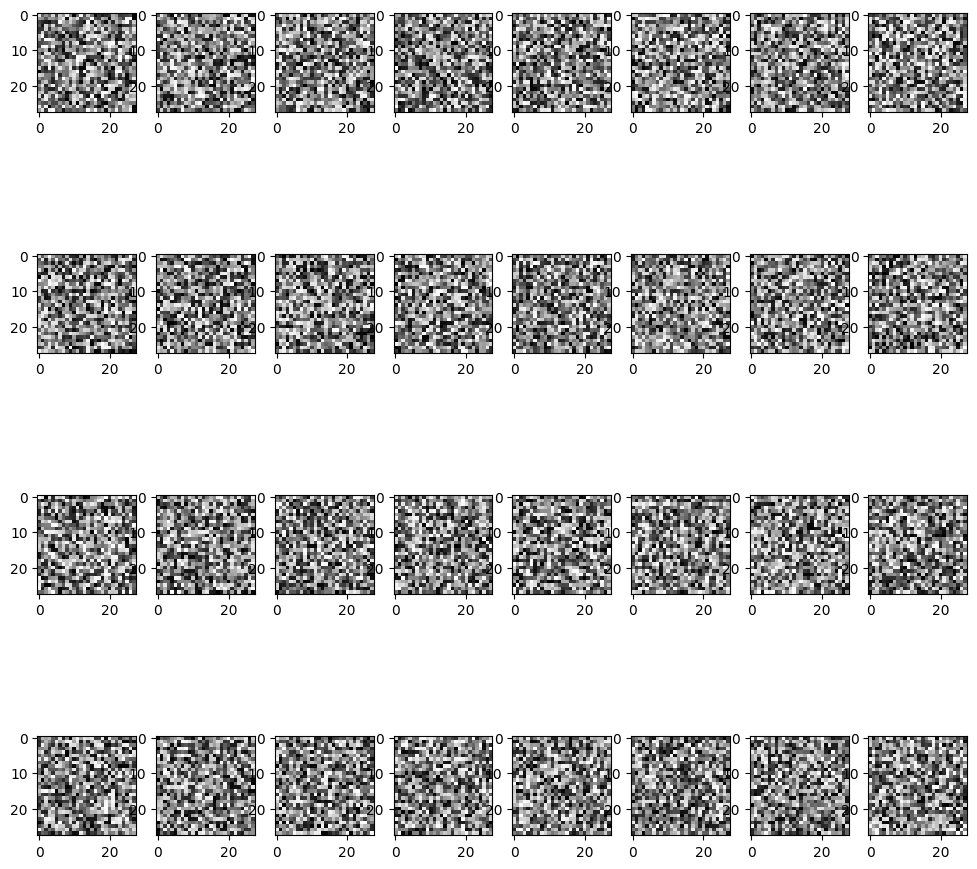

In [ ]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)
layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 0.1150 - accuracy: 0.9669
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 0.1099 - accuracy: 0.9684


In [ ]:
# Write the testing input and output variables
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.15247176587581635
Test accuracy: 0.9559000134468079


Shape of First Layer (784, 32)
Visualization of First Layer


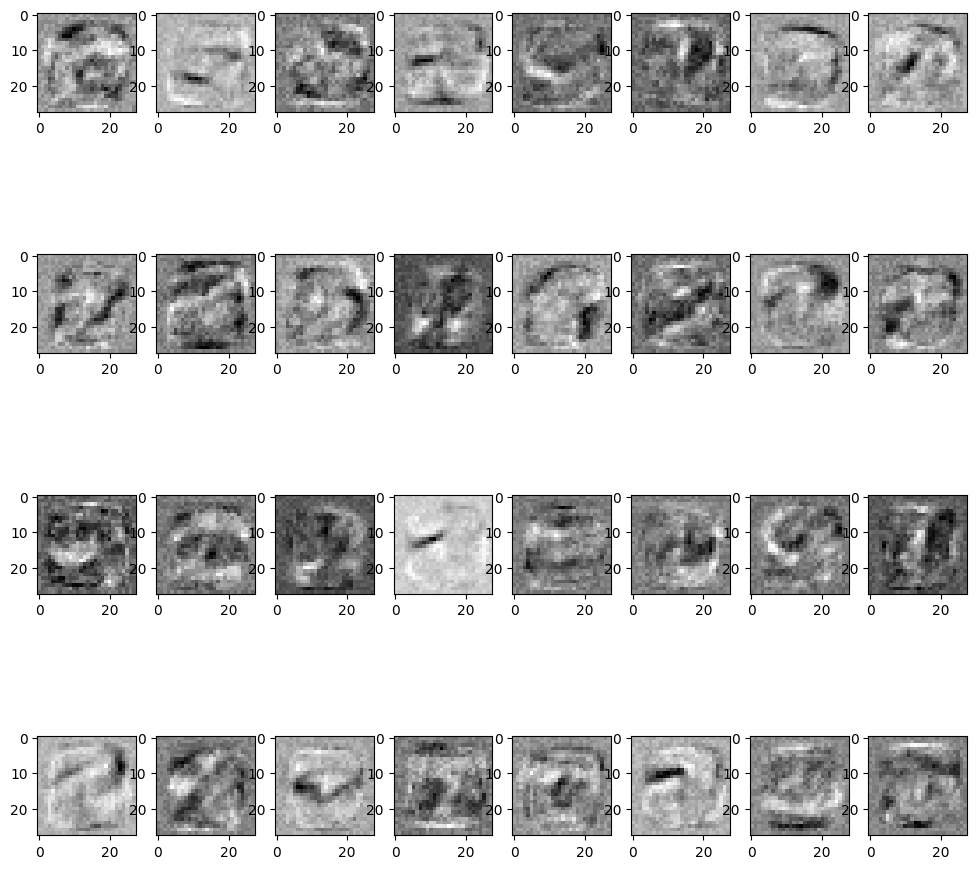

In [ ]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
prediction = model.predict(x_test[199:200])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

1/1 [==============================] - 0s 102ms/step
Prediction
 [1.1227623e-04 8.2013514e-03 9.6907693e-01 2.0485519e-02 3.9091377e-05
 2.7660228e-05 2.7735194e-05 5.5026799e-04 1.4172880e-03 6.2017483e-05]

Thresholded output
 [0 0 1 0 0 0 0 0 0 0]


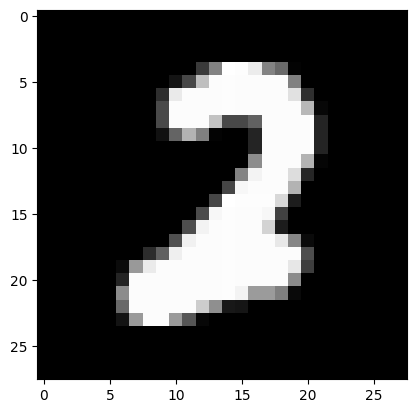

In [ ]:
plt.imshow(x_test[199:200].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving digit.jpg to digit.jpg


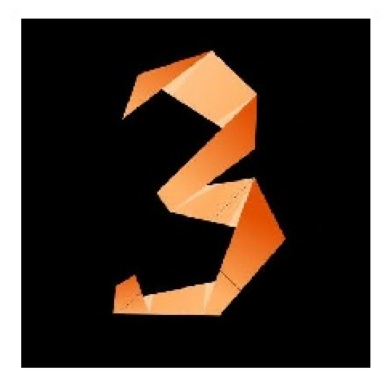

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image in color
image_bgr = cv2.imread('digit.jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.axis('off')  # Turn off axis labels and ticks
plt.show()
# Convert to RGB
#image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
#print(image_rgb.shape)
# Show image
#plt.imshow(image_rgb), plt.axis("off")
#plt.show()

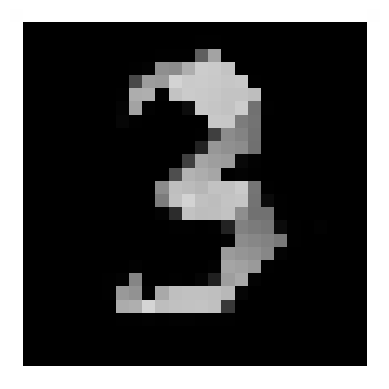

In [ ]:
image = cv2.imread('digit.jpg', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28))
# Show image
plt.imshow(image_resized, cmap='gray'), plt.axis("off")
plt.show()

In [ ]:
prediction = model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

1/1 [==============================] - 0s 23ms/step
Prediction Score:
 [2.7768494e-06 3.6342208e-05 2.7346643e-04 9.9954295e-01 3.2585071e-06
 8.0500482e-05 2.5646107e-09 4.7422350e-06 4.7557605e-05 8.2745564e-06]

Thresholded Score:
 [0 0 0 1 0 0 0 0 0 0]

Predicted Digit:
 3


In [ ]:
model_json = model.to_json()

# Write the file name of the model

with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
# Write the file name of the weights

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
 #load json and create model

# Write the file name of the model

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
# Write the file name of the weights

loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
loaded_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = loaded_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/2
469/469 [==============================] - 6s 9ms/step - loss: 0.1053 - accuracy: 0.9697
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 0.1005 - accuracy: 0.9711
Test loss: 0.1458950638771057
Test accuracy: 0.958299994468689


In [ ]:
import cv2
import os
import numpy as np

# Define paths to image folders
Lilly_file = '/content/flower_images/Lilly'
Lotus_file = '/content/flower_images/Lotus'
Orchid_file = '/content/flower_images/Orchid'
Sunflower_file = '/content/flower_images/Sunflower'
Tulip_file = '/content/flower_images/Tulip'

# Initialize lists to store images and labels
images = []
labels = []

# Define a dictionary to map class names to labels
class_mapping = {'Lilly': 0, 'Lotus': 1, 'Orchid': 2, 'Sunflower': 3, 'Tulip': 4}

# Load and preprocess Lilly images
for filename in os.listdir(Lilly_file):
    if filename.endswith('.jpg'):
        original_img = cv2.imread(os.path.join(Lilly_file, filename))
        img = cv2.resize(original_img, (128, 128))
        img = img.astype(np.float32) / 255.0
        kernel_sharpening = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
        img = cv2.filter2D(img, -1, kernel_sharpening)
        images.append(img)
        labels.append(class_mapping['Lilly'])

# Repeat the same process for other classes...

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Check the shape of the arrays
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)
